In [2]:

%pip install torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.2
    Uninstalling Pillow-8.3.2:
      Successfully uninstalled Pillow-8.3.2
Note: you may need to restart the kernel to use updated packages.


In [36]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)


In [37]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [38]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [67]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}

In [76]:
# Make sure that inputs are in the correct shape
train_batches = []
for batch in loaders['train']:
    inputs, labels = batch
    inps = inputs.view(inputs.size(0), -1)
    train_batches.append((inps, labels))

In [77]:
import torch.nn as nn

net = nn.Sequential(nn.Linear(784, 500, bias=False),
                    nn.BatchNorm1d(500),
                    nn.ReLU(),
                    nn.Linear(500, 500, bias=False),
                    nn.BatchNorm1d(500),
                    nn.ReLU(),
                    nn.Linear(500, 10),
                    nn.LogSoftmax(dim=1))


In [78]:
from torch.optim import SGD

optimizer = SGD(net.parameters(), lr=0.01)

In [79]:
#init stat arrays
lossi = []

In [80]:
import torch.nn.functional as F

max_steps = len(train_batches)
epochs = 10

for epoch in range(epochs):
    for i, batch in enumerate(train_batches):
        inputs, labels = batch
        inps = inputs

        #forward
        for layer in net:
            inps = layer(inps)

        #calcuate loss
        loss = F.cross_entropy(inps, labels)

        #zero grad 
        for layer in net:
            layer.zero_grad()

        #back propagation
        loss.backward()

        #update
        lr = 0.1 if i < max_steps / 2 else 0.01
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        optimizer.step()

        #collect stats
        lossi.append(loss.item())
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')



Epoch 1/10, Loss: 0.1200
Epoch 2/10, Loss: 0.0765
Epoch 3/10, Loss: 0.0526
Epoch 4/10, Loss: 0.0371
Epoch 5/10, Loss: 0.0284
Epoch 6/10, Loss: 0.0239
Epoch 7/10, Loss: 0.0200
Epoch 8/10, Loss: 0.0171
Epoch 9/10, Loss: 0.0146
Epoch 10/10, Loss: 0.0125


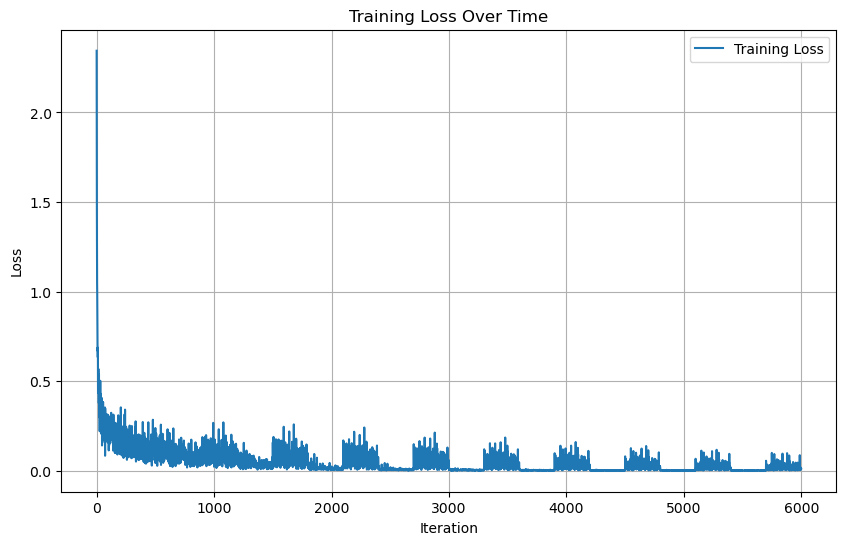

In [81]:
import matplotlib.pyplot as plt

# Create a plot of the training losses
plt.figure(figsize=(10, 6))
plt.plot(lossi, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
import torch

net.eval()

corrct = 0
total = 0

with torch.no_grad():
    for batch in loaders['test']:
        inputs, labels = batch
        inputs = inputs.view(inputs.size(0), -1)
        outputs = net(inputs)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        corrct += (predicted == labels).sum().item()

accuracy = corrct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 9.80%
